# <u>II) Jointure des fichiers

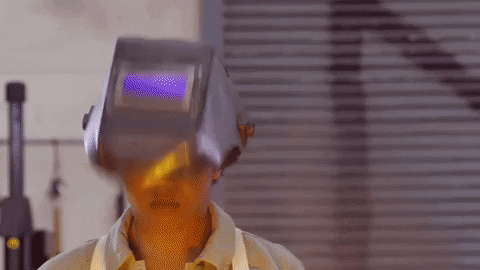

Maintenant que les fichiers / dataframes ont été nettoyés, **passons aux jointures de ces derniers !**<br>
<br>
Mais avant ça un **petit récapitulatif** s'impose.<br>

On sait que:<br>
<ul>
<li>le tableau transaction se compose de **679332 lignes**</li>
<li>le tableau client se compose de 8621 lignes</li>
<li>et le tableau produits se compose de 3287 lignes</li>
</ul>

Que cherche t-on ? <br>

Ce qu'on veut obtenir c'est **un tableau qui conserve toutes les données du dataframe transactions.csv et lier ce tableau au dataframe clients et produits** et ce même si il existe des **clients qui n'ont jamais rien acheté** ou **des produits qui n'ont jamais été vendus.** 


## <u>A) Première jointure : Jointure des dataframes transactions et customers

On sait ce dont on a besoin, mais une question demeure :<br>
<br>
**Comment y parvenir ?**
<br>
En procédant à la jointure **"full outer"** des deux dataframes par le biais de la methode **.merge()**. Ajoutons le paramètre **indicator** à la méthode **.merge()**. Ce dernier nous permettra de connaitre la **provenance des lignes jointes.**

In [45]:
pre_jointure = pd.merge(transactions, customers, on="client_id", how="outer", indicator=True)

Le paramètre **indicator** crée une nouvelle colonne **"_merge"** qui nous donne la provenance des lignes jointes. Les lignes peuvent provenir des deux dataframes, de celui de gauche uniquement, ou de celui de droite uniquement.<br>
 Dans ces cas d'espèces : l'indicateur fera apparaître respectivement **"both", "left_only" ou "right_only"**.

**Première question:** Combien de lignes de ce tableau nouvellement créer proviennent des deux dataframes ?

Pour répondre à cette question on doit chercher les lignes dont la valeur est **"both"** dans la colonne **"_merge".**

In [46]:
pre_jointure[pre_jointure['_merge']=='both']

id_prod                       date session_id client_id sex  birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1        1_498 2021-03-11 00:57:22.865244     s_4624     c_329   f   1967   
2       0_1140 2021-03-16 10:01:30.705174     s_7071     c_329   f   1967   
3        1_451 2021-03-18 17:26:18.887580     s_8134     c_329   f   1967   
4        1_381 2021-04-25 13:26:06.218857    s_25561     c_329   f   1967   
...        ...                        ...        ...       ...  ..    ...   
679327  0_2194 2022-03-18 23:53:54.697941   s_181130     c_177   m   1973   
679328  0_1059 2022-04-18 23:45:11.375521   s_196094     c_177   m   1973   
679329  0_2194 2022-04-18 23:53:54.697941   s_196094     c_177   m   1973   
679330  0_1059 2023-02-18 23:45:11.375521   s_343601     c_177   m   1973   
679331  0_2194 2023-02-18 23:53:54.697941   s_343601     c_177   m   1973   

       _merge  
0        both  
1        both  
2        both  
3        both  
4        both  
...       ...  
679327   both  
679328   both  
679329   both  
679330   both  
679331   both  

[679332 rows x 7 columns]

En toute fin de tableau nous voyons que **ce nouveau dataframe (df) est formé de 679332 lignes**. La réponse est présque évidente. J'ai fait le choix de concerver tout les lignes du **df transactions**, et à **chaque transaction est associée un client.** 
Il serait plus interressant de savoir s'il existe **des clients qui ne sont pas associés à une transaction**. Pour cela nous allons chercher les lignes dont la valeur est **"right_only" dans la colonne "_merge".** En somme, je vais demander à ce que soit affichées ( si elles existent) **les lignes provennat exclusivement du df customers.**

In [47]:
pre_jointure[pre_jointure['_merge']=='right_only']

id_prod date session_id client_id sex  birth      _merge
679332     NaN  NaT        NaN    c_8253   f   2001  right_only
679333     NaN  NaT        NaN    c_3789   f   1997  right_only
679334     NaN  NaT        NaN    c_4406   f   1998  right_only
679335     NaN  NaT        NaN    c_2706   f   1967  right_only
679336     NaN  NaT        NaN    c_3443   m   1959  right_only
679337     NaN  NaT        NaN    c_4447   m   1956  right_only
679338     NaN  NaT        NaN    c_3017   f   1992  right_only
679339     NaN  NaT        NaN    c_4086   f   1992  right_only
679340     NaN  NaT        NaN    c_6930   m   2004  right_only
679341     NaN  NaT        NaN    c_4358   m   1999  right_only
679342     NaN  NaT        NaN    c_8381   f   1965  right_only
679343     NaN  NaT        NaN    c_1223   m   1963  right_only
679344     NaN  NaT        NaN    c_6862   f   2002  right_only
679345     NaN  NaT        NaN    c_5245   f   2004  right_only
679346     NaN  NaT        NaN    c_5223   m   2003  right_only
679347     NaN  NaT        NaN    c_6735   m   2004  right_only
679348     NaN  NaT        NaN     c_862   f   1956  right_only
679349     NaN  NaT        NaN    c_7584   f   1960  right_only
679350     NaN  NaT        NaN      c_90   m   2001  right_only
679351     NaN  NaT        NaN     c_587   m   1993  right_only
679352     NaN  NaT        NaN    c_3526   m   1956  right_only

Et il y en a ! Le résultat ci-dessus est la liste des **clients auxquels aucunes transaction n'est lié**. En d'autres mots **les clients inscrits sur notre sites internet qui n'ont procédé à aucun achat**. Enregistrons les dans une variables " **clients_non_acheteur**"

In [48]:
clients_non_acheteur = pre_jointure[pre_jointure['_merge']=='right_only']

Combien de personne cela représente ? 

In [49]:
pre_jointure[pre_jointure['_merge']=='right_only'].count()

id_prod        0
date           0
session_id     0
client_id     21
sex           21
birth         21
_merge        21
dtype: int64

Très exactement **21 personnes**. Passons à la prochaine jointure.

In [50]:
jointure_finale = pd.merge(pre_jointure, products, on="id_prod", how="outer", indicator="origine")

Afin de garder les idées claires, une bonne choses à faire est de traduire ce que nous essayons de produire. Ici, c'est l'association des transactions ( et clients) aux produits. 
<br>
Très simplement, et mise à part anomalie alarmante, chaque transaction est associé à un produit ! Cela va presque sans dire !
<br>

Mais comme on l'a vue avec l'exemple des client non acheteurs, il se pourrait que nous disposions de produit pour lesquels aucunes transactions n'est associé. En somme, des produits qui ne se vendent pas !
<br>

J'utiliserai ici, le même raisonnement que plus haut avec le paramètre indicator. La seule différente est que le nom de cette colonen n'est plus _merge mais "origine"
<br>

Première question: Combien de lignes de ce tableau nouvellement créer proviennent des deux dataframes ?<br>

Pour répondre à cette question on doit chercher les lignes dont la valeur est "both" dans la colonne "origine".

In [51]:
jointure_finale[jointure_finale['origine']=='both']

id_prod                       date session_id client_id sex   birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967.00   
1       0_1259 2022-10-01 00:01:07.843138   s_275943     c_329   f 1967.00   
2       0_1259 2022-12-01 00:01:07.843138   s_305291     c_329   f 1967.00   
3       0_1259 2023-01-01 00:01:07.843138   s_320153     c_329   f 1967.00   
4       0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609   m 1980.00   
...        ...                        ...        ...       ...  ..     ...   
679327    2_81 2022-02-19 14:51:58.078656   s_167662    c_7616   m 1993.00   
679328   0_807 2021-07-24 17:43:23.555852    s_66634    c_8273   m 1991.00   
679329   1_408 2021-09-26 06:52:02.225335    s_95708    c_7402   m 1945.00   
679330   1_408 2022-11-26 06:52:02.225335   s_302962    c_7402   m 1945.00   
679331   1_408 2023-01-26 06:52:02.225335   s_332548    c_7402   m 1945.00   

       _merge  price categ origine  
0        both  11.99     0    both  
1        both  11.99     0    both  
2        both  11.99     0    both  
3        both  11.99     0    both  
4        both  11.99     0    both  
...       ...    ...   ...     ...  
679327   both  86.99     2    both  
679328   both   1.99     0    both  
679329   both  35.24     1    both  
679330   both  35.24     1    both  
679331   both  35.24     1    both  

[679111 rows x 10 columns]

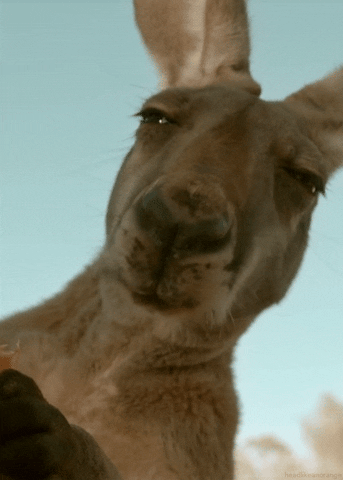

Si ce Kangourou à l'air si dubitatif c'est que le nombre de lignes de ce dataframe est inattendu ! Je m'explique : étant donné que la jointure est externe on aurait du avoir au minimum le même nombre de ligne both que de ligne total dans le df pre_jointure soit 679353 .
Ce qu'on peut en conclure: c'est qu'on dispose de 242 lignes très problématiques. On a donc des lignes du df transactions qui ne sont pas associées au df products.
Menons l'enquête !

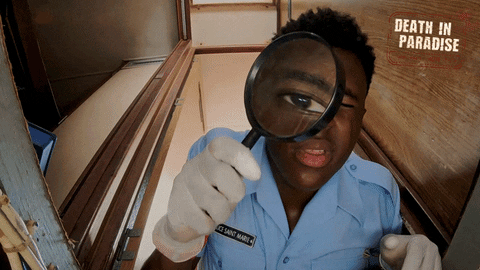

Commençons par répondre à une première question : Est-ce qu'il ya des produits que ne vendent pas, et si oui combien ? 
Pour répondre à cette question on doit chercher les lignes dont la valeur est "right-only" dans la colonne "origine". En gros, nous cherhons des produits qui ne sont pas associé à des transactions .

In [52]:
jointure_finale[jointure_finale['origine']=='right_only']

id_prod date session_id client_id  sex  birth _merge  price categ  \
679353  0_1016  NaT        NaN       NaN  NaN    NaN    NaN  35.06     0   
679354  0_1780  NaT        NaN       NaN  NaN    NaN    NaN   1.67     0   
679355  0_1062  NaT        NaN       NaN  NaN    NaN    NaN  20.08     0   
679356  0_1119  NaT        NaN       NaN  NaN    NaN    NaN   2.99     0   
679357  0_1014  NaT        NaN       NaN  NaN    NaN    NaN   1.15     0   
679358     1_0  NaT        NaN       NaN  NaN    NaN    NaN  31.82     1   
679359  0_1318  NaT        NaN       NaN  NaN    NaN    NaN  20.92     0   
679360  0_1800  NaT        NaN       NaN  NaN    NaN    NaN  22.05     0   
679361  0_1645  NaT        NaN       NaN  NaN    NaN    NaN   2.99     0   
679362   0_322  NaT        NaN       NaN  NaN    NaN    NaN   2.99     0   
679363  0_1620  NaT        NaN       NaN  NaN    NaN    NaN   0.80     0   
679364  0_1025  NaT        NaN       NaN  NaN    NaN    NaN  24.99     0   
679365    2_87  NaT        NaN       NaN  NaN    NaN    NaN 220.99     2   
679366   1_394  NaT        NaN       NaN  NaN    NaN    NaN  39.73     1   
679367    2_72  NaT        NaN       NaN  NaN    NaN    NaN 141.32     2   
679368   0_310  NaT        NaN       NaN  NaN    NaN    NaN   1.94     0   
679369  0_1624  NaT        NaN       NaN  NaN    NaN    NaN  24.50     0   
679370    2_86  NaT        NaN       NaN  NaN    NaN    NaN 132.36     2   
679371   0_299  NaT        NaN       NaN  NaN    NaN    NaN  22.99     0   
679372   0_510  NaT        NaN       NaN  NaN    NaN    NaN  23.66     0   
679373  0_2308  NaT        NaN       NaN  NaN    NaN    NaN  20.28     0   

           origine  
679353  right_only  
679354  right_only  
679355  right_only  
679356  right_only  
679357  right_only  
679358  right_only  
679359  right_only  
679360  right_only  
679361  right_only  
679362  right_only  
679363  right_only  
679364  right_only  
679365  right_only  
679366  right_only  
679367  right_only  
679368  right_only  
679369  right_only  
679370  right_only  
679371  right_only  
679372  right_only  
679373  right_only

Il y en a bel et bien et sont au nombre de 21. Enregistrons-les dans une variables "produits_sans_acheteurs"

In [53]:
produits_sans_acheteurs=jointure_finale[jointure_finale['origine']=='right_only']

Partons à la recherche de ces 242 lignes très problématiques. Pour ce faire commençons par faire apparaître les lignes dont la valeur est "left-only" dans la colonne "origine"

In [54]:
jointure_finale[jointure_finale['origine']=='left_only']

id_prod                       date session_id client_id sex   birth  \
56330   0_2245 2021-03-01 00:09:29.301897        s_3     c_580   m 1988.00   
56331   0_2245 2022-10-01 00:09:29.301897   s_275945     c_580   m 1988.00   
56332   0_2245 2022-12-01 00:09:29.301897   s_305293     c_580   m 1988.00   
56333   0_2245 2023-01-01 00:09:29.301897   s_320155     c_580   m 1988.00   
56334   0_2245 2021-05-01 03:35:03.146305    s_28235    c_5714   f 1972.00   
...        ...                        ...        ...       ...  ..     ...   
679348     NaN                        NaT        NaN     c_862   f 1956.00   
679349     NaN                        NaT        NaN    c_7584   f 1960.00   
679350     NaN                        NaT        NaN      c_90   m 2001.00   
679351     NaN                        NaT        NaN     c_587   m 1993.00   
679352     NaN                        NaT        NaN    c_3526   m 1956.00   

            _merge  price categ    origine  
56330         both    NaN   NaN  left_only  
56331         both    NaN   NaN  left_only  
56332         both    NaN   NaN  left_only  
56333         both    NaN   NaN  left_only  
56334         both    NaN   NaN  left_only  
...            ...    ...   ...        ...  
679348  right_only    NaN   NaN  left_only  
679349  right_only    NaN   NaN  left_only  
679350  right_only    NaN   NaN  left_only  
679351  right_only    NaN   NaN  left_only  
679352  right_only    NaN   NaN  left_only  

[242 rows x 10 columns]

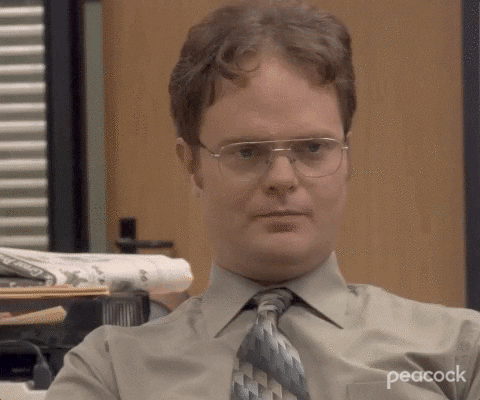

Bingo ! Le raisonnement état bon ! On a un produit 0_2245 qui n'est pas associé aux transactions ! Cela peut paraître contre instinctif, parce qu'on dispose de l'id produit. Mais il ne faut pas oublier que le df transactions dispose de l'id_prod, comme on peut le voir si dessous.

In [55]:
transactions[transactions['id_prod']=='0_2245']

id_prod                       date session_id client_id
404212  0_2245 2021-03-01 00:09:29.301897        s_3     c_580
641758  0_2245 2021-03-02 15:55:49.728644      s_783    c_8060
292401  0_2245 2021-03-07 20:00:01.525768     s_3159    c_1189
441897  0_2245 2021-03-23 15:57:44.266387    s_10427    c_5869
585729  0_2245 2021-03-28 10:46:04.804784    s_12567     c_966
...        ...                        ...        ...       ...
223961  0_2245 2023-02-10 11:54:44.891532   s_339558    c_6952
359313  0_2245 2023-02-16 05:53:01.627491   s_342289    c_7954
393029  0_2245 2023-02-17 03:03:12.668129   s_342683    c_1533
504963  0_2245 2023-02-17 20:34:06.230094   s_343000    c_1551
44098   0_2245 2023-02-21 04:06:19.106398   s_344671    c_5352

[221 rows x 4 columns]

Mais si on fait la même recherche dans le df products :

In [56]:
products[products['id_prod']=='0_2245']

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

On se rend compte qu'on a pas de produit 0_2245, que ce produit ne dispose pas d'id_prod dans le df, ce qui est indispensable à la jointure étant donné qu'elle se fait sur l'id_prod donc que celui-ci ne peut pas être associé au df transactions plus encore : il ne dispose pas de prix ni même de catégorie, ce qui est un peu plus embetant. 

In [57]:
jointure_finale["categ"] = np.where(jointure_finale["id_prod"] == "0_2245",
                               0,
                               jointure_finale["categ"])

jointure_finale["price"] = np.where(jointure_finale["id_prod"] == "0_2245",
                               jointure_finale.loc[(jointure_finale["categ"]==0),"price"].median(),
                               jointure_finale["price"])

jointure_finale.isna().sum()

id_prod       21
date          42
session_id    42
client_id     21
sex           21
birth         21
_merge        21
price         21
categ         21
origine        0
dtype: int64

In [58]:
jointure_finale

id_prod                       date session_id client_id  sex   birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329    f 1967.00   
1       0_1259 2022-10-01 00:01:07.843138   s_275943     c_329    f 1967.00   
2       0_1259 2022-12-01 00:01:07.843138   s_305291     c_329    f 1967.00   
3       0_1259 2023-01-01 00:01:07.843138   s_320153     c_329    f 1967.00   
4       0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609    m 1980.00   
...        ...                        ...        ...       ...  ...     ...   
679369  0_1624                        NaT        NaN       NaN  NaN     NaN   
679370    2_86                        NaT        NaN       NaN  NaN     NaN   
679371   0_299                        NaT        NaN       NaN  NaN     NaN   
679372   0_510                        NaT        NaN       NaN  NaN     NaN   
679373  0_2308                        NaT        NaN       NaN  NaN     NaN   

       _merge  price  categ     origine  
0        both  11.99   0.00        both  
1        both  11.99   0.00        both  
2        both  11.99   0.00        both  
3        both  11.99   0.00        both  
4        both  11.99   0.00        both  
...       ...    ...    ...         ...  
679369    NaN  24.50   0.00  right_only  
679370    NaN 132.36   2.00  right_only  
679371    NaN  22.99   0.00  right_only  
679372    NaN  23.66   0.00  right_only  
679373    NaN  20.28   0.00  right_only  

[679374 rows x 10 columns]

In [59]:
jointure_finale[jointure_finale['id_prod']=='0_2245']

id_prod                       date session_id client_id sex   birth  \
56330  0_2245 2021-03-01 00:09:29.301897        s_3     c_580   m 1988.00   
56331  0_2245 2022-10-01 00:09:29.301897   s_275945     c_580   m 1988.00   
56332  0_2245 2022-12-01 00:09:29.301897   s_305293     c_580   m 1988.00   
56333  0_2245 2023-01-01 00:09:29.301897   s_320155     c_580   m 1988.00   
56334  0_2245 2021-05-01 03:35:03.146305    s_28235    c_5714   f 1972.00   
...       ...                        ...        ...       ...  ..     ...   
56546  0_2245 2022-11-20 20:21:06.505658   s_300389    c_8524   f 1982.00   
56547  0_2245 2021-10-20 13:11:05.671456   s_107564    c_1746   m 1994.00   
56548  0_2245 2021-08-23 09:24:14.133889    s_79561    c_6713   f 1963.00   
56549  0_2245 2022-07-23 09:24:14.133889   s_242482    c_6713   f 1963.00   
56550  0_2245 2022-08-23 09:24:14.133889   s_257267    c_6713   f 1963.00   

      _merge  price  categ    origine  
56330   both   9.99   0.00  left_only  
56331   both   9.99   0.00  left_only  
56332   both   9.99   0.00  left_only  
56333   both   9.99   0.00  left_only  
56334   both   9.99   0.00  left_only  
...      ...    ...    ...        ...  
56546   both   9.99   0.00  left_only  
56547   both   9.99   0.00  left_only  
56548   both   9.99   0.00  left_only  
56549   both   9.99   0.00  left_only  
56550   both   9.99   0.00  left_only  

[221 rows x 10 columns]

In [60]:
jointure_finale.categ.dtypes

dtype('float64')

In [61]:
jointure_finale[jointure_finale['id_prod']=='0_2245'].dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                 category
birth                float64
_merge              category
price                float64
categ                float64
origine             category
dtype: object

In [62]:
jointure_finale=jointure_finale.drop(["_merge","origine"],axis=1)

In [63]:
jointure_finale

id_prod                       date session_id client_id  sex   birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329    f 1967.00   
1       0_1259 2022-10-01 00:01:07.843138   s_275943     c_329    f 1967.00   
2       0_1259 2022-12-01 00:01:07.843138   s_305291     c_329    f 1967.00   
3       0_1259 2023-01-01 00:01:07.843138   s_320153     c_329    f 1967.00   
4       0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609    m 1980.00   
...        ...                        ...        ...       ...  ...     ...   
679369  0_1624                        NaT        NaN       NaN  NaN     NaN   
679370    2_86                        NaT        NaN       NaN  NaN     NaN   
679371   0_299                        NaT        NaN       NaN  NaN     NaN   
679372   0_510                        NaT        NaN       NaN  NaN     NaN   
679373  0_2308                        NaT        NaN       NaN  NaN     NaN   

        price  categ  
0       11.99   0.00  
1       11.99   0.00  
2       11.99   0.00  
3       11.99   0.00  
4       11.99   0.00  
...       ...    ...  
679369  24.50   0.00  
679370 132.36   2.00  
679371  22.99   0.00  
679372  23.66   0.00  
679373  20.28   0.00  

[679374 rows x 8 columns]